# Fleet Generation

In [3]:
import pandas as pd

In [4]:
import sys
import os
import numpy as np

In [3]:
sys.path.append(os.path.join(*os.getcwd().split('/')[:3], 'midas-applied-ds', 'Data'))

In [4]:
import glob

In [5]:
glob.glob(os.path.join(*os.getcwd().split('/')[1:3], '*'))

[]

In [6]:
glob.glob('/home/aysola/midas-applied-ds/Data/Processed/ICE_trips/all*')

['/home/aysola/midas-applied-ds/Data/Processed/ICE_trips/alltrips.csv',
 '/home/aysola/midas-applied-ds/Data/Processed/ICE_trips/alltrips_unprocessed.csv',
 '/home/aysola/midas-applied-ds/Data/Processed/ICE_trips/alltrips2.csv',
 '/home/aysola/midas-applied-ds/Data/Processed/ICE_trips/alltrips_with_weight_and_disp.csv']

In [57]:
data = pd.read_csv('/home/aysola/midas-applied-ds/Data/Processed/ICE_trips/alltrips_with_weight_and_disp.csv')

In [8]:
data.shape

(11804, 8)

In [58]:
data

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,TripId,VehId,Aggressivity,Aggressiveness,Fuel Consumed[L],Distance[km],Weight,Displacement,Fuel Economy[mpg]
0,0,0,0,0,123,475.645508,242212.485095,0.895646,9.225222,2500.0,1.8,24.227270
1,1,1,1,1,135,269.540959,101741.261711,0.441901,2.223611,3500.0,2.5,11.835816
2,2,2,2,2,521,459.151574,199787.209526,0.000000,2.603500,4500.0,3.5,inf
3,3,3,3,3,259,401.982744,145957.042566,0.000000,8.514889,3500.0,2.7,inf
4,4,4,4,4,575,266.112770,117044.120748,1.008958,6.323556,4000.0,2.4,14.741860
...,...,...,...,...,...,...,...,...,...,...,...,...
17540,17540,17540,17540,17540,266,409.468672,48638.660755,0.000000,39.254278,3500.0,2.4,inf
17541,17541,17541,17541,17541,282,307.183274,121877.568423,0.000000,6.124056,3500.0,2.5,inf
17542,17542,17542,17542,17542,244,274.127964,148747.893217,0.531646,3.259972,3500.0,2.5,14.422995
17543,17543,17543,17543,17543,528,301.006582,173741.356366,0.000000,10.645278,4500.0,3.3,inf


In [10]:
import matplotlib.pyplot as plt

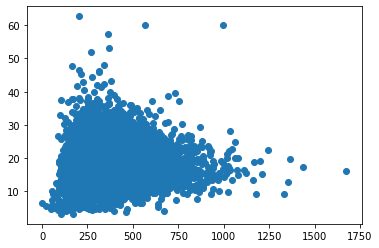

In [11]:
plt.scatter(data['Aggressivity'], data['Fuel Economy[mpg]'])

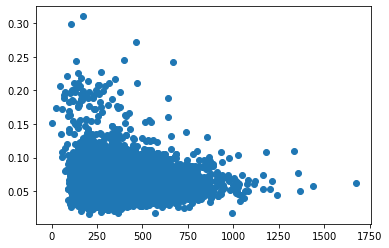

In [12]:
plt.scatter(data['Aggressivity'], (1/data['Fuel Economy[mpg]']))

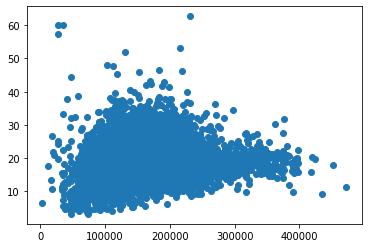

In [13]:
plt.scatter(data['Aggressiveness'], (data['Fuel Economy[mpg]']))

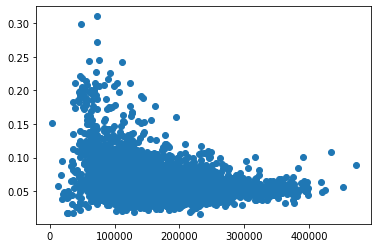

In [14]:
plt.scatter((data['Aggressiveness']), (1/data['Fuel Economy[mpg]']))

In [15]:
from sklearn.linear_model import LinearRegression

In [23]:
economy = LinearRegression().fit(np.array(data['Aggressiveness']).reshape(-1,1), data['Fuel Economy[mpg]'])

In [36]:
pred = economy.predict(np.array(data['Aggressiveness']).reshape(-1,1))
squared_resid = (data['Fuel Economy[mpg]'] - pred)**2
variance = (data['Fuel Economy[mpg]']-data['Fuel Economy[mpg]'].mean())**2
r_squared = 1 - (squared_resid.sum()/variance.sum())

In [37]:
r_squared

0.03349691796949994

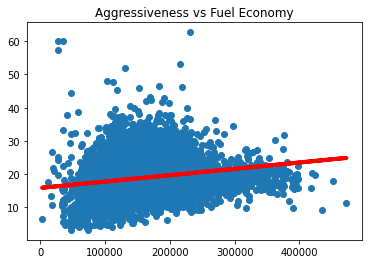

In [43]:
plt.scatter(data['Aggressiveness'], (data['Fuel Economy[mpg]']))
plt.plot(data['Aggressiveness'], pred, color='red', linewidth=4.0)
plt.title('Aggressiveness vs Fuel Economy')
plt.show()

In [48]:
## Now for Consumption:
consumption = LinearRegression().fit(np.array(data['Aggressiveness']).reshape(-1,1), (1/data['Fuel Economy[mpg]']))
pred = consumption.predict(np.array(data['Aggressiveness']).reshape(-1,1))
squared_resid = ((1/data['Fuel Economy[mpg]']) - pred)**2
variance = ((1/data['Fuel Economy[mpg]'])-(1/data['Fuel Economy[mpg]']).mean())**2
r_squared = 1 - (squared_resid.sum()/variance.sum())
print(r_squared)

0.055417986635833416


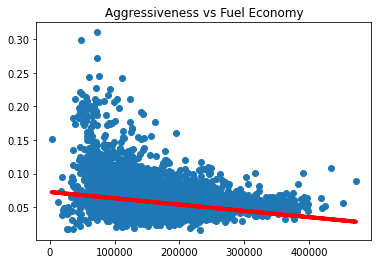

In [47]:
plt.scatter(data['Aggressiveness'], (1/data['Fuel Economy[mpg]']))
plt.plot(data['Aggressiveness'], pred, color='red', linewidth=4.0)
plt.title('Aggressiveness vs Fuel Economy')
plt.show()

In [ ]:
# Now for aggresivity:

0.000736005666565176


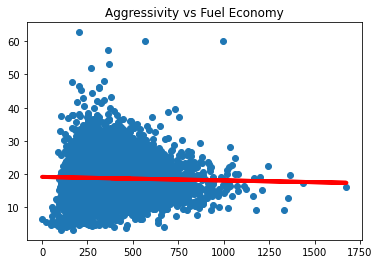

In [57]:
#economy
consumption = LinearRegression().fit(np.array(data['Aggressivity']).reshape(-1,1), (data['Fuel Economy[mpg]']))
pred = consumption.predict(np.array(data['Aggressivity']).reshape(-1,1))
squared_resid = ((data['Fuel Economy[mpg]']) - pred)**2
variance = ((data['Fuel Economy[mpg]'])-(data['Fuel Economy[mpg]']).mean())**2
r_squared = 1 - (squared_resid.sum()/variance.sum())
print(r_squared)
plt.scatter(data['Aggressivity'], (data['Fuel Economy[mpg]']))
plt.plot(data['Aggressivity'], pred, color='red', linewidth=4.0)
plt.title('Aggressivity vs Fuel Economy')
plt.show()

0.0016599441161987416


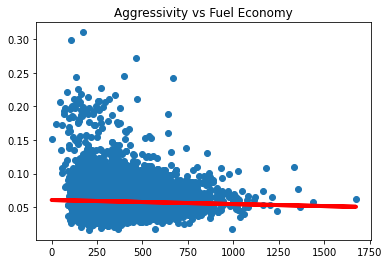

In [142]:
#consumption
consumption = LinearRegression().fit(np.array(data['Aggressivity']).reshape(-1,1), (1/data['Fuel Economy[mpg]']))
pred = consumption.predict(np.array(data['Aggressivity']).reshape(-1,1))
squared_resid = ((1/data['Fuel Economy[mpg]']) - pred)**2
variance = ((1/data['Fuel Economy[mpg]'])-(1/data['Fuel Economy[mpg]']).mean())**2
r_squared = 1 - (squared_resid.sum()/variance.sum())
print(r_squared)
plt.scatter(data['Aggressivity'], (1/data['Fuel Economy[mpg]']))
plt.plot(data['Aggressivity'], pred, color='red', linewidth=4.0)
plt.title('Aggressivity vs Fuel Economy')
plt.show()

## What about fitting a SUPER SIMPLE neural network? 

In [53]:
import torch
import torch.nn as nn

In [402]:
# lets fit a really stupid NN:
# Aggressiveness -> 5 nodes -> 10 nodes -> 1 node (output)
# class Squish(nn.Module):
#     def __init__(self):
#         return self
#     def forward()

# model = nn.Sequential(
#     nn.Linear(1, 5),
#     nn.ReLU(),
#     nn.Linear(5,10),
#     nn.ReLU(),
#     nn.Linear(10,1)
# )

# model = nn.Sequential(
#     nn.Linear(1,10),
#     nn.ReLU(),
#     nn.Linear(10,20),
#     nn.ReLU(),
#     nn.Linear(20,40),
#     nn.ReLU(),
#     nn.Linear(40,20),
#     nn.ReLU(),
#     nn.Linear(20,10),
#     nn.ReLU(),
#     nn.Linear(10,5),
#     nn.ReLU(),
#     nn.Linear(5,1),
# )


# model = nn.Sequential(
#     nn.Linear(1,10),
#     nn.ReLU(),
#     nn.Linear(10,1),
# )

model = nn.Sequential(
    nn.Linear(1,32),
    nn.ReLU(),
    nn.Linear(32,64),
    nn.ReLU(),
    nn.Linear(64,1)
)

In [361]:
X = torch.tensor(np.array(data['Aggressiveness']).reshape(-1,1), dtype=torch.float32)
y = torch.tensor(np.array((1/data['Fuel Economy[mpg]'])).reshape(-1,1), dtype=torch.float32)

In [403]:
def train(X, y, epochs = 500):
    optimizer = torch.optim.Adagrad(model.parameters())
    for i in range(epochs):
        preds = model.forward(X)
        loss = ((y-preds)**2).sum()
        with torch.no_grad():
            optimizer.zero_grad()
            if i%100 == 0:
                print(loss.item())
            loss.backward()
            optimizer.step()
        
        

In [347]:
train(X,y)

2912144326656.0
615204.75
900.8546142578125
125.9376220703125
125.87528991699219


In [348]:
pred = model.forward(X).detach().numpy().reshape(-1)
squared_resid = ((1/data['Fuel Economy[mpg]']) - pred)**2
variance = ((1/data['Fuel Economy[mpg]'])-(1/data['Fuel Economy[mpg]']).mean())**2
r_squared = 1 - (squared_resid.sum()/variance.sum())
print(r_squared)

-25.066867691158762


In [349]:
for i in model.modules():
    if type(i) is nn.Linear:
        print(i.weight)

Parameter containing:
tensor([[-0.3123],
        [-0.0183],
        [-0.8189],
        [-0.1869],
        [ 0.0821],
        [-0.7355],
        [ 0.6740],
        [ 0.0160],
        [-0.1865],
        [-0.7160]], requires_grad=True)
Parameter containing:
tensor([[ 0.2757,  0.1795,  0.0310,  0.1598,  0.3081,  0.2170, -0.0380,  0.0204,
          0.0764,  0.1594]], requires_grad=True)


(array([5.375e+03, 5.797e+03, 5.010e+02, 6.400e+01, 4.300e+01, 1.800e+01,
        4.000e+00, 2.000e+00]),
 array([0.01594491, 0.05276915, 0.0895934 , 0.12641764, 0.16324186,
        0.2000661 , 0.23689035, 0.2737146 , 0.31053883], dtype=float32),
 <BarContainer object of 8 artists>)

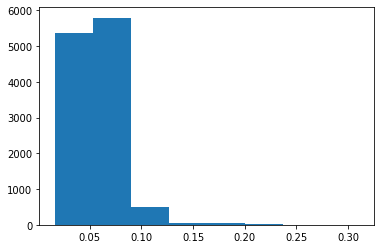

In [350]:
#histogram of real fuel consumption
plt.hist(y.reshape(-1).numpy(), bins=8)

(array([0.10275641, 2.28873837, 4.80225639, 1.77094243, 0.33797224,
        0.11479817, 0.05378656, 0.00481671]),
 array([-0.24200058, -0.13647157, -0.03094256,  0.07458645,  0.18011546,
         0.28564447,  0.39117348,  0.4967025 ,  0.6022315 ], dtype=float32),
 <BarContainer object of 8 artists>)

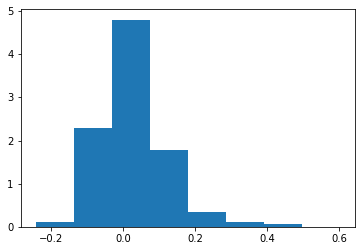

In [351]:
plt.hist(pred,bins=8, density=True)
# plt.hist(y.reshape(-1))

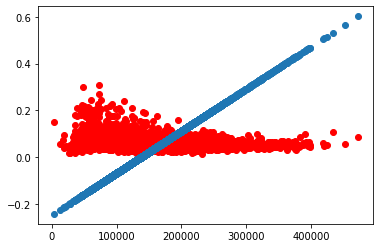

In [356]:
# plt.scatter(data['Aggressivity'], (1/data['Fuel Economy[mpg]']))
# plt.plot(data['Aggressivity'], pred, color='red', linewidth=4.0)
# plt.title('Aggressivity vs Fuel Economy')
plt.scatter(X.reshape(-1).numpy(), (y.numpy().reshape(-1)), color='red')
plt.scatter(X.reshape(-1).numpy(), pred)
plt.show()

In [404]:
X_ = torch.tensor(np.linspace(0, 10000, 100001).reshape(-1,1), dtype=torch.float32)
y_ = X_**2

In [405]:
model(X_)

tensor([[-7.4079e-02],
        [-5.4776e-02],
        [-4.0135e-02],
        ...,
        [-3.1107e+02],
        [-3.1107e+02],
        [-3.1108e+02]], grad_fn=<AddmmBackward>)

In [406]:
train(X_, y_, 800)

2.0000656589357004e+20
1.9919834568231748e+20
1.9807608735798605e+20
1.9674467553377255e+20
1.9524659533897427e+20
1.936077248792625e+20
1.918464831734258e+20
1.899771550765322e+20


In [400]:
model[0].weight

Parameter containing:
tensor([[ 0.5127],
        [ 1.0426],
        [ 1.5176],
        [-0.7165],
        [ 0.8035],
        [ 1.6705],
        [ 0.9710],
        [-0.1715],
        [-0.9412],
        [ 0.8311]], requires_grad=True)

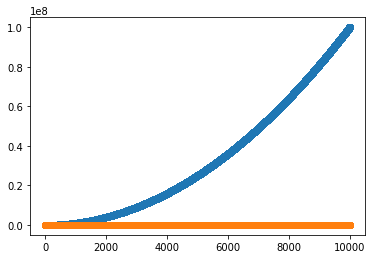

In [401]:
pred = model.forward(X_)
plt.scatter(X_, y_)
plt.scatter(X_, pred.detach().numpy())

# Fleet Generation with Normal Distributions:

## Fleet Generation Qualms/Issues:

So here is the thing with fleet generation. We cant actually simulate any of the fuel economy data because that is scientifically unsound. It doesn't make sense for us to say: Here is the rpm/MAF etc across a trip and then get the fuel consumption from those numbers. So, we need to reframe the problem. Given a trip characteristics (vehicle weight, average speed, speed variance, displacement, and distance traveled) we will search for an equivalent trip in our Ann Arbor data and use that as a trip in our new dataset.

In [61]:
data['score'] = 0

In [79]:
data.sort_values(by=['Fuel Consumed[L]'])['Fuel Economy[mpg]']!=float('inf')

8018     False
4087     False
11373    False
4085     False
4083     False
         ...  
17020     True
2751      True
6221      True
1272      True
10029     True
Name: Fuel Economy[mpg], Length: 17545, dtype: bool

In [101]:
def search(data, trip_char:dict):
    data['score'] = 0
    for k,v in trip_char.items():
        #we'll use squared error divided by the mean value of the column for our loss:
        # let T be target column and V be the value we want to closely match:
        # loss = sqrt(((T-V)/T.mean())**2)
        data['score'] += (((data[k] - v)/data[k].mean())**2)**(1/2)
        
    return data.sort_values(by=['score'], ascending=True).drop('score', axis=1)

In [92]:
pd.concat([search(data, 
       {
           'Distance[km]':2.22, 
           'Displacement':2.4,
           'Weight':3000
       }
      ).iloc[:1],
search(data, 
       {
           'Distance[km]':2.22, 
           'Displacement':2.4,
           'Weight':3000
       }
      ).iloc[:1]
], axis=0)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,TripId,VehId,Aggressivity,Aggressiveness,Fuel Consumed[L],Distance[km],Weight,Displacement,Fuel Economy[mpg],score
1667,1667,1667,1667,1667,562,263.493072,147058.005453,0.259039,2.221056,3000.0,2.4,20.167774,0.000199
1667,1667,1667,1667,1667,562,263.493072,147058.005453,0.259039,2.221056,3000.0,2.4,20.167774,0.000199


In [ ]:
def fleet_creation(data, fleet_char:dict):
    """
    data is where to perform searching
    fleet_char: dictionary with the following characteristics.
        size: []
    """

In [82]:
np.random.normal(10, 3, size = 5)

array([ 8.6203924 , 14.80248024, 10.46852257,  7.81959355,  8.48747206])

In [93]:
np.random.randint(0, 10, 50)

array([9, 7, 3, 3, 3, 7, 7, 7, 2, 9, 4, 7, 0, 2, 0, 3, 3, 6, 1, 5, 1, 7,
       2, 5, 3, 6, 6, 0, 3, 0, 5, 7, 9, 8, 4, 9, 8, 9, 9, 1, 9, 4, 1, 4,
       3, 9, 5, 2, 1, 0])

In [120]:
def generate_fleet(data, fleet_dynamics = None):
    """
    fleet_dynamics is a dict of fleet characteristics.
    keys marked as (DIST) are distributions and are a tuple 
    default_keys:
        size: int [1, ] the number of trips to simulate
        num_vehicles: int [1, size] the number of vehicles to create (these vehicles will then be selected to make trips given size)
        Chars: A dictionary with the following key/values:
            NOT IN USE -- percent_AV: scalar [0,1] -> the number of vehicles that are AVs (defaults at 1 for 100%. ONLY these vehicles will have changed aggressivness values)
            NOT IN USE -- OAT: (DIST) Outside air temperature.
            NOT IN USE -- Average Speed: (DIST) Average Vehicle Speed measured in KM/H
            NOT IN USE -- Variance Speed: (DIST) Variance of Vehicle Speed measured in KM/H
            Vehicle Weight: (DIST) Weight of the vehicle in Kilograms
            Vehicle Displacement: (DIST) the displacement of the vehicle engine
            Distance: (DIST) the distance travelled over the trip
        
    """
    # first thing to do is generate our vehicles to perform search over:
    vehicles = {k:np.random.normal(v[0], v[1], size=fleet_dynamics['num_vehicles']) for k,v in fleet_dynamics['Chars'].items()}
#     print(vehicles)
    vehicles = [{k:v[i] for k,v in vehicles.items()} for i in range(fleet_dynamics['num_vehicles'])]
#     print(vehicles)
    # vehicles is a list of dictionaries with k:v as search term and search value.
    vehicle_mask = np.random.randint(0, fleet_dynamics['num_vehicles'], fleet_dynamics['size'])
    
    ret_list = []
    for i in vehicle_mask:
        ret_list.append(search(data, vehicles[i]).iloc[:1])
        
    return pd.concat(ret_list)
    
    

In [122]:
generate_fleet(data, {'size':1, 'num_vehicles':1, 
                      'Chars':{
                               'Distance[km]':(15, 4),
                               'Displacement':(2, 1),
                               'Weight':(3000, 500)
                              }
                     })

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,TripId,VehId,Aggressivity,Aggressiveness,Fuel Consumed[L],Distance[km],Weight,Displacement,Fuel Economy[mpg]
17062,17062,17062,17062,17062,157,356.883571,249558.105575,3.387445,16.092833,3500.0,3.5,11.174409


## GENERATION Pt 2:

List of all the variables we're going to have in our regression (at least somewhat comprehensive)

```
Air temperature,
Precipitation,
Weight,
Average Speed,
Speed Variance,
Displacement,
Distance[km],
Vehicle Type,
```

In [197]:
def generate_trip_data(**kwargs):
    """
    kwargs:
        size = # of trips
        num_vehicles = # of vehicles
        prop_ICE = proportion of ICE vehicles
        prop_HEV = proportion of HEV
        prop_PHEV = prop of PHEV
        trips: DICT with trip characteristics as tuples
        cars: DICT with vehicle characteristics as tuples
    
    """
    size = kwargs['size']
    num_vehicles = kwargs['num_vehicles']
    
    #TODO: figure out how to deal with these
    # PRESENTLY Vehicle Type DEFAULTS TO ICE
#     prop_ICE = kwargs['prop_ICE']
#     prop_HEV = kwargs['prop_HEV']
#     prop_PHEV =kwargs['prop_PHEV']
    
    #DEFAULT TRIP AND CARS
    trips = {
        'Air Temp (units)':(0,0),
        'Precipitation (units)':(0,0),
        'Average Speed (units)':(0,0),
        'Speed Variance (units)':(0,0),
        'Distance (units)':(0,0)
            }
    
    cars = {
        'Weight (units)':(0,0),
        'Displacement (units)':(0,0),
            }
    #OVERWRITING DEAFAULTS
    
    for k,v in kwargs['trips'].items():
        trips[k] = v
    for k,v in kwargs['cars'].items():
        cars[k] = v
    
    car_keys = cars.keys()
    trip_keys = trips.keys()
    
    data = {k:[] for k in trips.keys()}
    for k in cars.keys():
        data[k] = []
    data['Vehicle Type'] = []
    
    
    vehicles = {k:np.random.normal(v[0], v[1], size=num_vehicles) for k,v in cars.items()}
    vehicles = [{k:v[i] for k,v in vehicles.items()} for i in range(num_vehicles)]
    vehicle_mask = np.random.randint(0, num_vehicles, size)
    
    trips = {k:np.random.normal(v[0], v[1], size) for k,v in trips.items()}
    trips = [{k:v[i] for k,v in trips.items()} for i in range(size)]
    
    # data has all the keys we just need to append for each value:
    for i, veh in enumerate(vehicle_mask):
        for k in trip_keys:
            data[k].append(trips[i][k])
        for k in car_keys:
            data[k].append(vehicles[veh][k])
            
        data['Vehicle Type'].append('ICE')
            
    return pd.DataFrame(data)


In [198]:
args = {'size':10, 'num_vehicles':5,
        'trips':{'OAT':(72, 20), 'Distance':(10,1)},
        'cars':{'Displacement':(3,1), 'Weight':(3000,500)}
       }

gen = generate_trip_data(**args)


In [199]:
gen

,Air Temp,Precipitation,Average Speed,Speed Variance,Distance,OAT,Weight,Displacement,Vehicle Type
0,0.0,0.0,0.0,0.0,8.859489,50.735414,2599.295624,2.550561,ICE
1,0.0,0.0,0.0,0.0,9.106707,104.808715,3099.186723,4.196583,ICE
2,0.0,0.0,0.0,0.0,10.023986,82.881598,2911.729838,3.638809,ICE
3,0.0,0.0,0.0,0.0,8.462334,52.835531,3085.211283,3.292021,ICE
4,0.0,0.0,0.0,0.0,9.429408,58.854848,3099.186723,4.196583,ICE
5,0.0,0.0,0.0,0.0,11.060453,64.223717,2911.729838,3.638809,ICE
6,0.0,0.0,0.0,0.0,11.295259,80.083409,3085.211283,3.292021,ICE
7,0.0,0.0,0.0,0.0,9.204781,93.479671,2911.729838,3.638809,ICE
8,0.0,0.0,0.0,0.0,9.646972,86.097323,3099.186723,4.196583,ICE
9,0.0,0.0,0.0,0.0,10.305263,25.511017,3119.727099,4.028697,ICE


## MANUAL FLEET CREATION:

In [5]:
class ManualFleet():
    def __init__(self, col_names:list = ['Air Temp', 'Precipitation', 'Average Speed', 'Speed Variance', 'Distance', 'Weight', 'Displacement', 'Vehicle Type']):
        # set default data to nothing
        self.data = pd.DataFrame({l:[] for l in col_names})
        
    def reset(self):
        self.data = pd.DataFrame({l:[] for l in self.data.columns}).reset_index(drop=True)
    
    def update(self, data:dict):
        """
        Data has:
        'Air Temp'
        'Precipitation'
        'Average Speed'
        'Speed Variance'
        'Distance'
        'Weight'
        'Displacement'
        'Vehicle Type'
        """
        self.data = pd.concat([self.data, pd.DataFrame(data)])
        return self.data
    def show(self):
        return self.data

In [6]:
m = ManualFleet()

In [7]:
m.show()

,Air Temp,Precipitation,Average Speed,Speed Variance,Distance,Weight,Displacement,Vehicle Type


In [8]:
m.update({'Air Temp':[10], 'Precipitation':[50], 'Average Speed':[3], 'Speed Variance':[95], 'Distance':[0], 'Weight':[3932], 'Displacement':[8], 'Vehicle Type': 'ICE'})

,Air Temp,Precipitation,Average Speed,Speed Variance,Distance,Weight,Displacement,Vehicle Type
0,10.0,50.0,3.0,95.0,0.0,3932.0,8.0,ICE


In [204]:
m.show()

,Air Temp,Precipitation,Average Speed,Speed Variance,Distance,Weight,Displacement,Vehicle Type
0,10.0,50.0,3.0,95.0,0.0,3932.0,8.0,ICE


In [192]:
m.reset()

In [193]:
m.show()

,Air Temp,Precipitation,Average Speed,Speed Variance,Distance,Weight,Displacement,Vehicle Type
